Olá, Reinner

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

In [1]:
#import lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
import seaborn as sns


# EDA

## Analysis

In [2]:
path_0 = '/datasets/geo_data_0.csv'
path_1 = '/datasets/geo_data_1.csv'
path_2 = '/datasets/geo_data_2.csv'

In [3]:
geo_0 = pd.read_csv(path_0)
print(geo_0.head())

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [4]:
print(geo_0.describe())

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347


In [5]:
print(geo_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


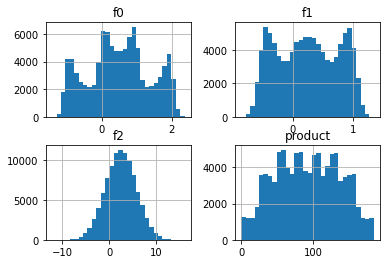

In [6]:
geo_0.hist( bins=30);

### Observations

- Don´t have an missing values
- Median and mean are close, it shows that we don´t have outliers
- Data follows normal distribution
- Don´t have categorical data

## Preparing

### Remove feature `id`

The feature `id` don´t have any impact in the volume predict

In [7]:
geo_0 = geo_0.drop(columns='id', axis=1)
print(geo_0)

             f0        f1        f2     product
0      0.705745 -0.497823  1.221170  105.280062
1      1.334711 -0.340164  4.365080   73.037750
2      1.022732  0.151990  1.419926   85.265647
3     -0.032172  0.139033  2.978566  168.620776
4      1.988431  0.155413  4.751769  154.036647
...         ...       ...       ...         ...
99995  0.971957  0.370953  6.075346  110.744026
99996  1.392429 -0.382606  1.273912  122.346843
99997  1.029585  0.018787 -1.348308   64.375443
99998  0.998163 -0.528582  1.583869   74.040764
99999  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 4 columns]


### Separate between `Features` and `Target`

In [8]:
#create a function to separate features and target
def separate (data, target_column):
    features = data.drop(columns=target_column, axis=1)
    target = data[target_column]
    return features, target

In [9]:
features, target = separate(geo_0,'product')
print(features.head())
print(target.head())

         f0        f1        f2
0  0.705745 -0.497823  1.221170
1  1.334711 -0.340164  4.365080
2  1.022732  0.151990  1.419926
3 -0.032172  0.139033  2.978566
4  1.988431  0.155413  4.751769
0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64


### Create `train`and `valid`

In [36]:
random_seed = np.random.RandomState(12345)
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=random_seed)

### Features Escalabilitie 

In [11]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Ajustou no treino e aplicou na validação
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

EDA apenas em geo_0
</div>

# Trainning Model

## GEO_0

In [12]:
#linear trainning model function
def linear_trainning(f_train, t_train, f_valid):
    model = LinearRegression()
    model.fit(f_train, t_train)
    predictions = model.predict(f_valid)
    return model, predictions


In [13]:
model_0, predictions_0 = linear_trainning(features_train, target_train, features_valid)
print(f'Mean predicted volume for model_0:{predictions_0.mean()}')

Mean predicted volume for model_0:92.59256778438035


## RMSE

### GEO_0

In [14]:
#RMSE = MSE**0.5
mse_0 = mean_squared_error(target_valid, predictions_0)
rmse_0 = mse_0**0.5
print(f'RMSE for model_0 are: {rmse_0}')

RMSE for model_0 are: 37.5794217150813


## GEO_1 and GEO_2

Create a function to execute all prepare process

In [37]:
#function to do preparing process
def prepare_process(name, path, target_column):
    #read dataframe
    name = pd.read_csv(path)
    #remove 'id' column
    name = name.drop(columns='id', axis=1)
    #separate featues and target
    features, target = separate(name,target_column)
    #create train and valid
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=random_seed)
    #Scalling
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
        
    return features_train, target_train, features_valid, target_valid, name

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Você está lendo novamente sem necessidade. Você poderia passar o dataframe já lido. 
</div>

### GEO_1

In [38]:
geo_1 = None
features_1_train, target_1_train, features_1_valid, target_1_valid, geo_1 = prepare_process(geo_1, path_1, 'product')

In [17]:
model_1, predictions_1 = linear_trainning(features_1_train, target_1_train, features_1_valid)
print(f'Mean predicted volume for model_1: {predictions_1.mean()}')

Mean predicted volume for model_1: 68.728546895446


In [18]:
#RMSE = MSE**0.5
mse_1 = mean_squared_error(target_1_valid, predictions_1)
rmse_1 = mse_1**0.5
print(f'RMSE for model_1 are: {rmse_1}')

RMSE for model_1 are: 0.893099286775617


### GEO_2

In [39]:
geo_2 = None
features_2_train, target_2_train, features_2_valid, target_2_valid, geo_2 = prepare_process(geo_2, path_2, 'product')

In [20]:
model_2, predictions_2 = linear_trainning(features_2_train, target_2_train, features_2_valid)
print(f'Mean predicted volume for model_2: {predictions_2.mean()}')

Mean predicted volume for model_2: 94.96504596800489


In [21]:
#RMSE = MSE**0.5
mse_2 = mean_squared_error(target_2_valid, predictions_2)
rmse_2 = mse_2**0.5
print(f'RMSE for model_2 are: {rmse_2}')

RMSE for model_2 are: 40.02970873393434


## Observations

- For GEO_1 we have the best RMSE
- For GEO_0 and GEO_2 the error was very close

# Calculate Profit

Create Variables

In [22]:
#mean
geo_0_mean = predictions_0.mean()
geo_1_mean = predictions_1.mean()
geo_2_mean = predictions_2.mean()

In [23]:
cost = 100000000
wells = 200
revenue = 4500 #per barrel
#cost per well
mean_target = cost/wells
#min volume pwe well
min_barrel = mean_target/revenue
print(mean_target)
print(min_barrel)


500000.0
111.11111111111111


A oil well will be profitable if produce at least `111` barrel that equal to `$500.000`

Compare mean volume per region with mean barrel target 

In [24]:
barrel_0 = geo_0_mean*revenue
barrel_1 = geo_1_mean*revenue
barrel_2 = geo_2_mean*revenue

if barrel_0 >= mean_target:
    print('GEO_0 is profitable')
elif barrel_1 >= mean_target:
    print('GEO_1 is profitable')
elif barrel_2 >= mean_target:
    print('GEO_2 is profitable')
else:
    print('There isn´t profitable region')



There isn´t profitable region


## Profit for higher volumes well

Choose 200 higher volumes weel per region

In [113]:
def order(data, wells=200):
    data = np.sort(data)[::-1]
    high_data = data[:wells]
    return high_data

In [114]:
#function that receive the data and numbers of well to calculate gross profit
def profit_calculate(data, wells=200):
    #ordering per volume
    high_data = order(data, wells)
   
    #summarizing volume
    sum_volumes = sum(high_data)
    #calculating gross profit
    profit = (sum_volumes*revenue) - (mean_target*wells)
    return high_data, profit, sum_volumes


In [29]:
high_geo_0, profit_0, sum_volumes_0 = profit_calculate(predictions_0)
high_geo_1, profit_1, sum_volumes_1 = profit_calculate(predictions_1)
high_geo_2, profit_2, sum_volumes_2 = profit_calculate(predictions_2)

max_value = max(profit_0, profit_1, profit_2)

if max_value == profit_0:
    print(f"The most profitable region is GEO_0 with {profit_0} of profit.")
elif max_value == profit_1:
    print(f"The most profitable region is GEO_0 with {profit_1} of profit.")
else:
    print(f"The most profitable region is GEO_0 with {profit_2} of profit.")




The most profitable region is GEO_0 with 39960488.77465132 of profit.


In [259]:
print(profit_1)
print(profit_2)

24857120.51973544
33217543.962432653


- Analysing just the best wells all regions are profitable
- The best region to develop wells is GEO_0 because are the most profitable

# BootStrapping

In [82]:
#Create a function to calculate the profit using bootstrapping
def profit_bootstrapping(data, n=1000):
    value = []
    data_series = pd.Series(data)
    
    for i in range(n):
        #bootstrapping
        subsample = data_series.sample(frac=1, replace=True, random_state=random_seed)
        #calculate profit
        high_data, profit, sum_volumes = profit_calculate(subsample)
        #profit_series = pd.Series(profit)
        value.append(profit)
    return value

        

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Usou frac=1
</div>

## Bootstrapping for GEO_0

In [98]:
profit_0_distribution = pd.Series(profit_bootstrapping(high_geo_0))

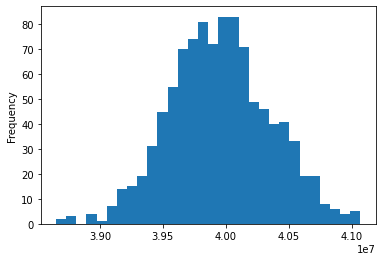

In [79]:
profit_0_distribution.plot(kind='hist', bins=30);

In [84]:
mean_bootstrapping_predictions_0 = profit_0_distribution.mean()
print("The mean profit is:",mean_bootstrapping_predictions_0 )

The mean profit is: 39955091.43072484


In [81]:
lower_0 = profit_0_distribution.quantile(0.025)
upper_0 = profit_0_distribution.quantile(0.95)
print(f"Confidence_interval is [{lower_0}, {upper_0}]")


Confidence_interval is [39176232.16142836, 40615940.10784068]


## GEO_0 Profit Probability

In [226]:
#Create a function to calculate probability for predictions
from scipy.stats import norm

def volume_probability(data, target_valid):
    residual = target_valid -  data
    mean_residual = np.mean(residual)
    std_residual = np.std(residual)
    probabilities = [norm.cdf(value, loc=mean_residual, scale=std_residual) for value in data ]
    probability_series = pd.Series(probabilities)
    return probability_series

In [229]:
#filtering just the wells with risk lower than 2.5%
risk = 0.025
prob_0 = volume_probability(predictions_0, target_valid)
prob_0_risk = prob_0[prob_0>risk]
print(prob_0_risk)

0        0.994852
1        0.981150
2        0.981539
3        0.992100
6        0.999586
           ...   
24994    0.999952
24995    0.997072
24996    0.988887
24998    0.999208
24999    0.999207
Length: 19915, dtype: float64


In [260]:
#order from lower to high risk
prob_0_risk_percentual = (prob_0_risk*100).sort_values(ascending=False)
print(prob_0_risk_percentual)

9317     99.999924
219      99.999873
10015    99.999866
11584    99.999862
23388    99.999813
           ...    
3426     97.503054
8953     97.502629
54       97.501959
16271    97.501478
24914    97.500258
Length: 19915, dtype: float64


In [262]:
#correlating probabilities with predictions volumes
prob_pred_0 = pd.Series(predictions_0).loc[prob_0_risk_percentual.index]
#separating the 200 high well volumes
high_prob_pred_0 = prob_pred_0[:200]
print(high_prob_pred_0)

9317     180.180713
219      176.252213
10015    175.850623
11584    175.658429
23388    173.299686
            ...    
7888     148.507064
7890     148.481767
24051    148.476498
24160    148.436761
20340    148.365941
Length: 200, dtype: float64


In [269]:
high_data_prob_0, prob_0_profit, sum_prob_0_volumes = profit_calculate(high_prob_pred_0)
print(f"The Profit for wells lower risk is:{prob_0_profit:.2f}")

The Profit for wells lower risk is:39960488.77


In [270]:
if prob_0_profit > profit_0:
    print("For region 0 the best strategie is choose lower wells risk.")
else:
    print("For region 0 the best strategie is choose high wells volumes.")

For region 0 the best strategie is choose high wells volumes.


## Bootstrapping for GEO_1

The mean profit is: 24856110.626448877
Confidence_interval is [24821913.863509424, 24886135.23725023]


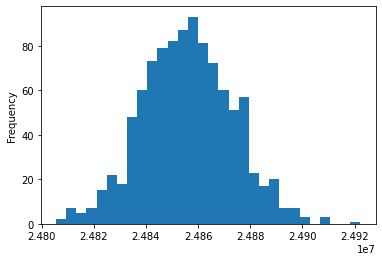

In [87]:
profit_1_distribution = pd.Series(profit_bootstrapping(high_geo_1))
profit_1_distribution.plot(kind='hist', bins=30);
mean_bootstrapping_predictions_1 = profit_1_distribution.mean()
print("The mean profit is:",mean_bootstrapping_predictions_1 )
lower_1 = profit_1_distribution.quantile(0.025)
upper_1 = profit_1_distribution.quantile(0.95)
print(f"Confidence_interval is [{lower_1}, {upper_1}]")

## GEO_1 Probaility Profit

In [246]:
prob_1 = volume_probability(predictions_1, target_1_valid)
prob_1_risk = prob_1[prob_1>0.975]
print(prob_1_risk)

6        0.982621
26       0.982439
39       0.981498
41       0.982813
42       0.982560
           ...   
24981    0.981353
24984    0.981340
24990    0.982134
24995    0.982445
24997    0.983108
Length: 4186, dtype: float64


In [261]:
#order from lower to high risk
prob_1_risk_percentual = (prob_1_risk*100).sort_values(ascending=False)
print(prob_1_risk_percentual)

20430    98.432167
7777     98.429405
8755     98.425148
1178     98.416469
4285     98.413767
           ...    
15255    97.985168
15307    97.984353
9119     97.959051
123      97.956692
19140    97.921287
Length: 4186, dtype: float64


In [263]:
#correlating probabilities with predictions volumes
prob_pred_1 = pd.Series(predictions_1).loc[prob_1_risk_percentual.index]
#separating the 200 high well volumes
high_prob_pred_1 = prob_pred_1[:200]
print(high_prob_pred_1)

20430    139.818970
7777     139.773423
8755     139.703330
1178     139.560938
4285     139.516754
            ...    
12774    138.421423
8040     138.416960
2257     138.413881
17108    138.412834
9693     138.410697
Length: 200, dtype: float64


In [267]:
high_data_prob_1, prob_1_profit, sum_prob_1_volumes = profit_calculate(high_prob_pred_1)
print(f"The Profit for wells lower risk is:{prob_1_profit:.2f}")

The Profit for wells lower risk is:24857120.52


In [268]:
if prob_1_profit > profit_1:
    print("For region 1 the best strategie is choose lower wells risk.")
else:
    print("For region 1 the best strategie is choose high wells volumes.")

For region 1 the best strategie is choose high wells volumes.


## Bootstrapping for GEO_2

The mean profit is: 33213663.301123507
Confidence_interval is [32552781.68151693, 33775369.32151818]


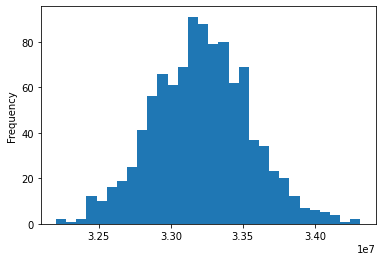

In [88]:
profit_2_distribution = pd.Series(profit_bootstrapping(high_geo_2))
profit_2_distribution.plot(kind='hist', bins=30);
mean_bootstrapping_predictions_2 = profit_2_distribution.mean()
print("The mean profit is:",mean_bootstrapping_predictions_2 )
lower_2 = profit_2_distribution.quantile(0.025)
upper_2 = profit_2_distribution.quantile(0.95)
print(f"Confidence_interval is [{lower_2}, {upper_2}]")

## GEO_2 Probability Profit

In [250]:
prob_2 = volume_probability(predictions_2, target_2_valid)
prob_2_risk = prob_2[prob_2>0.975]
print(prob_2_risk)

3        0.984429
4        0.990928
5        0.993762
6        0.992643
8        0.988780
           ...   
24992    0.991601
24993    0.976277
24994    0.994332
24997    0.979202
24999    0.995897
Length: 12204, dtype: float64


In [252]:
#order from lower to high risk
prob_2_risk_percentual = (prob_2_risk*100).sort_values(ascending=False)
print(prob_2_risk_percentual)

22636    99.965885
24690    99.965431
7811     99.959179
1581     99.954829
6751     99.953944
           ...    
21486    97.501153
9780     97.500991
16097    97.500467
8207     97.500314
10290    97.500021
Length: 12204, dtype: float64


In [256]:
#correlating probabilities with predictions volumes
prob_pred_2 = pd.Series(predictions_2).loc[prob_2_risk_percentual.index]
#separating the 200 high well volumes
high_prob_pred_2 = prob_pred_2[:200]
print(high_prob_pred_2)

22636    165.856833
24690    165.679685
7811     163.439962
1581     162.062589
6751     161.797476
            ...    
5541     142.490763
18126    142.485922
11122    142.465777
22669    142.454763
23447    142.408851
Length: 200, dtype: float64


In [265]:
high_data_prob_2, prob_2_profit, sum_prob_2_volumes = profit_calculate(high_prob_pred_2)
print(f"The Profit for wells lower risk is:{prob_2_profit:.2f}")

The Profit for wells lower risk is:33217543.96


In [266]:
if prob_2_profit > profit_2:
    print("For region 2 the best strategie is choose lower wells risk.")
else:
    print("For region 2 the best strategie is choose high wells volumes.")

For region 2 the best strategie is choose high wells volumes.


# Final Observations

- The most profitable region is GEO_0 using the 200 highest volumes and bootstrapping with 95% of confidence
- All region follow a normal distribution
- All region are profitable if use just the 200 highest volumes
- Even changing the strategy, region 0  remains the most profitable


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição (ex: bootstrap implementado corretamente)
- Usou inglês


Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>